# 인공신경망(Artifical Neural Network)

* 사람의 두뇌의 생물학적 작동형태를 모방해서 컴퓨터로 하여금 지적능력을 갖게 한 방법론
* 인공신경망이 더 확장된 것이 Deep Learning

###### 인공신경망의 구조

1. 입력층(input Layer)  : 지료가 입력
1. 은닉층(Hidden Layer) : 은닉층에서 가중치를 주어 계산
1. 출력층(Output Layer) : 계산결과를 받아서 출력
* 딥러닝은 은닉층의 갯수를 많이 늘려서 계산하는 방법

###### 퍼셉트론
<img src="./images/28.머신러닝_지도학습_5_인공신경망_01.png" width="500" height="400">
<img src="./images/28.머신러닝_지도학습_5_인공신경망_02.png" width="500" height="400">

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

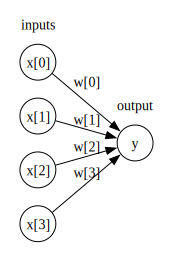

In [2]:
import mglearn
mglearn.plots.plot_logistic_regression_graph()

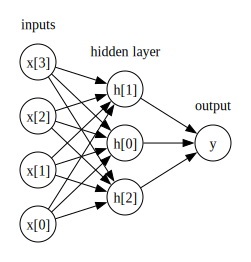

In [3]:
# 1개의 은닉층
mglearn.plots.plot_single_hidden_layer_graph()

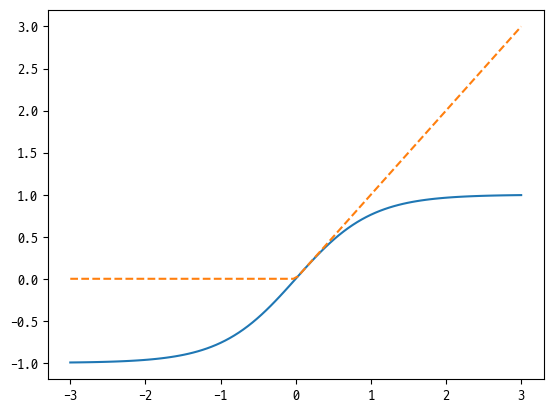

In [12]:
# 활성화함수
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.show()

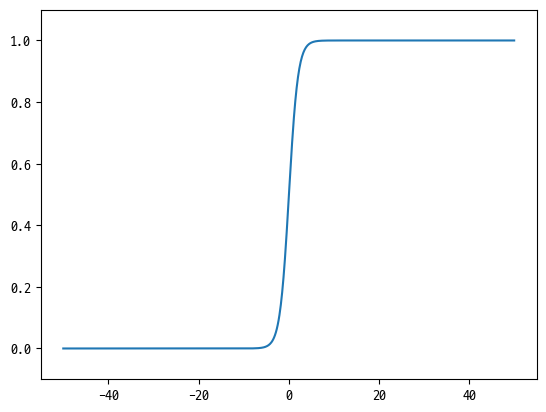

In [17]:
# sigmoid함수 구현
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-50.0, 50.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

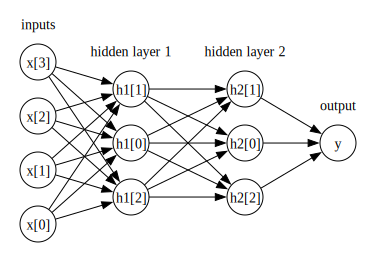

In [18]:
# 2개의 은닉층
mglearn.plots.plot_two_hidden_layer_graph()

#### 신경망

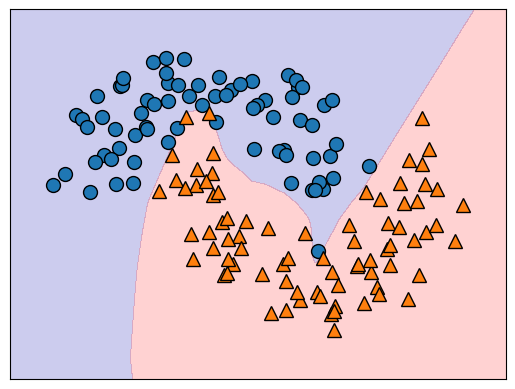

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = datasets.make_moons(n_samples=200, noise=.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

# solver='lbfgs' 옵션은 가중치(기울기)를 최적화 시키는 알고리즘
mlp = MLPClassifier(solver='lbfgs', activation='relu', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

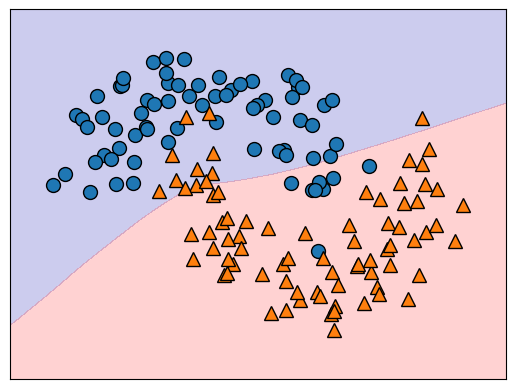

In [22]:
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
mlp = MLPClassifier(solver='adam', activation='relu', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

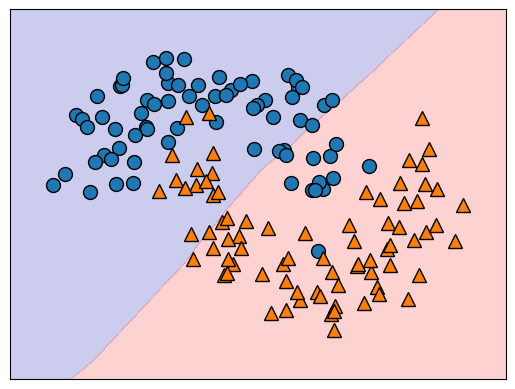

In [24]:
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
mlp = MLPClassifier(solver='sgd', activation='relu', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

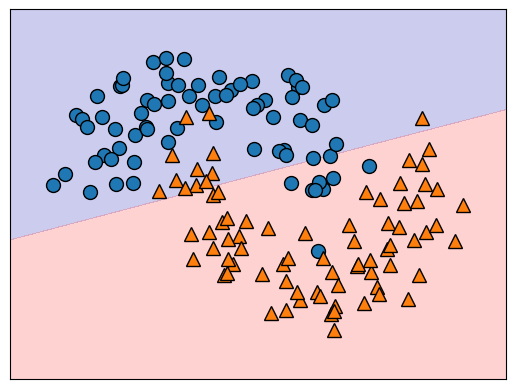

In [26]:
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
mlp = MLPClassifier(solver='adam', activation='tanh', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

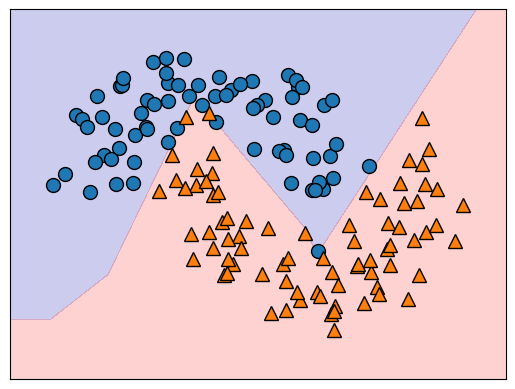

In [32]:
# 1개의 은닉층에 유닛이 10개
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
mlp = MLPClassifier(solver='lbfgs', activation='relu'
                    , random_state=0
                    , hidden_layer_sizes=(10,)).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

# 결과분석
# 1개의 은닉층에 10개의 유닛(hidden_layer_sizes=(10,))이 만들어낸 직선(1차방정식) 
# 10개가 합쳐져서 결정경계를 나타낸 것이다.
# 부드러운 결정경계(과대적합감소)를 원할 경우에는 유닛을 더 추가하거나 활성화함수를
# tanh을 사용할 수 있다.

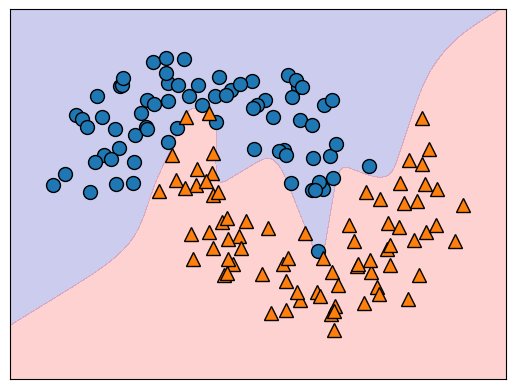

In [33]:
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
mlp = MLPClassifier(solver='lbfgs', activation='tanh'
                    , random_state=0
                    , hidden_layer_sizes=(10,)).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

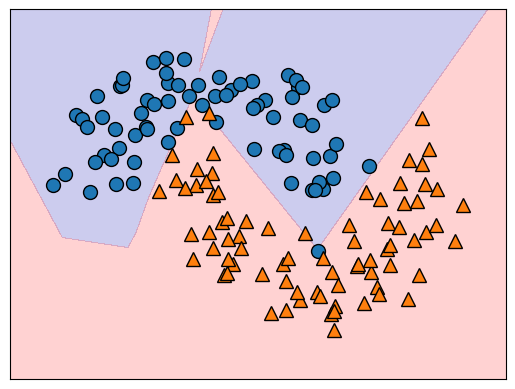

In [34]:
# 2개의 은닉층에 유닛이 10개 : relu vs tanh 비교
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
mlp = MLPClassifier(solver='lbfgs', activation='relu'
                    , random_state=0
                    , hidden_layer_sizes=(10,10)).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

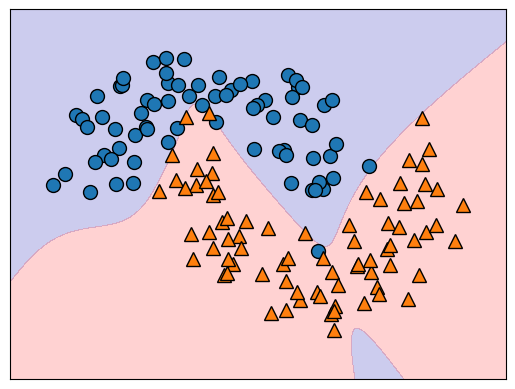

In [37]:
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
mlp = MLPClassifier(solver='lbfgs', activation='tanh'
                    , random_state=0
                    , hidden_layer_sizes=(10,10)).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2)

plt.show()

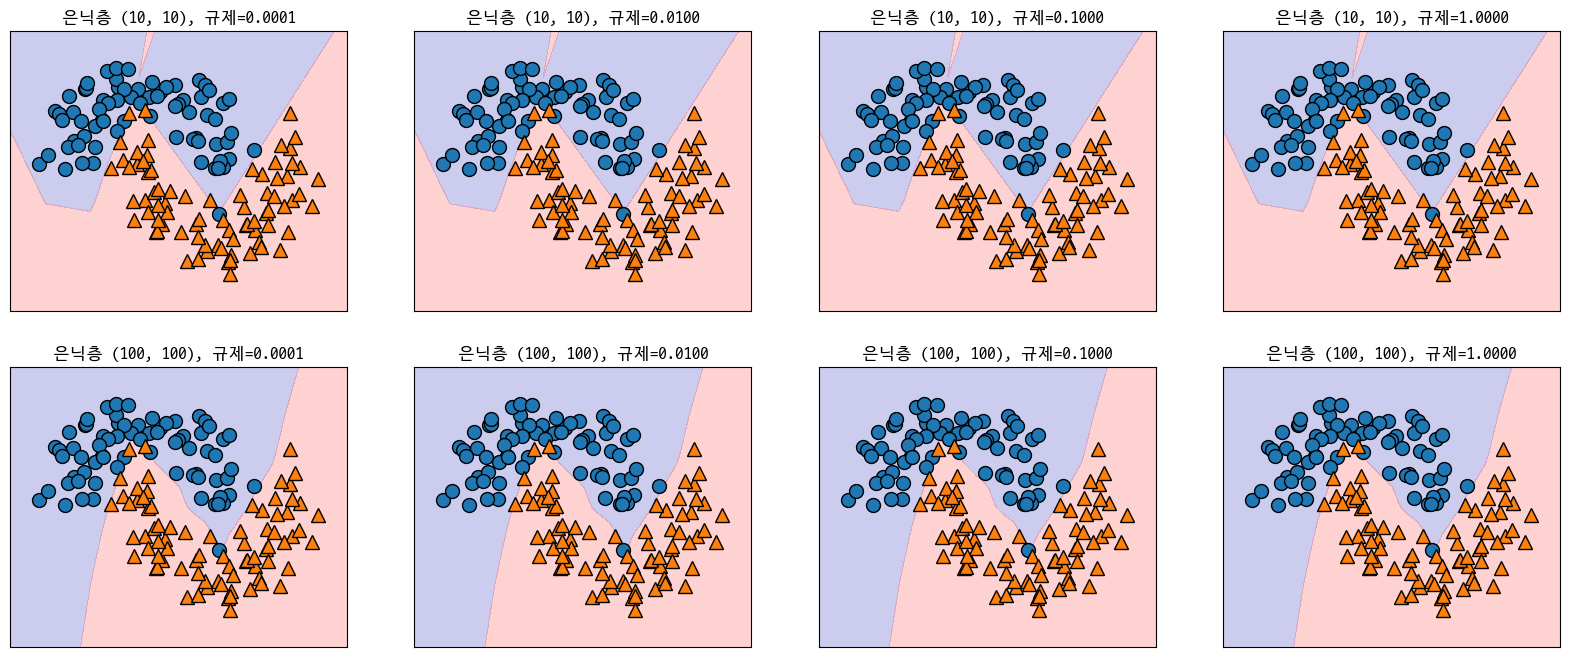

In [38]:
# 은닉층과 유닛의 갯수 변경하여 비교하기
# 신경망의 복잡도를 제어하는 방법은 은닉과 유닛수에 규제(alpha)를 사용한다.
fig, axes = plt.subplots(2,4,figsize=[20,8])

for axes, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axes, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', activation='relu'
                            , random_state=0
                            , hidden_layer_sizes=(n_hidden_nodes,n_hidden_nodes))
        mlp.fit(X_train, y_train)      
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.2, ax=ax)
        ax.set_title(f'은닉층 {n_hidden_nodes,n_hidden_nodes}, 규제={alpha:.4f}')